# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [4]:
#Your code here
new_cols = [col.lower() for col in df.columns]
df.columns = new_cols
df.head()


,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [8]:
#Your code here
df = df.set_index('entries')
df.head()

,index,linename,c/a,unit,scp,station,division,date,time,desc,exits
entries,,,,,,,,,,,
6736067,0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,2283184
6736087,1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,2283188
6736105,2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,2283229
6736180,3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,2283314
6736349,4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,2283384


## Painstakingly change the index back

In [9]:
# Your code here
df = df.reset_index()
df.head()


,entries,index,linename,c/a,unit,scp,station,division,date,time,desc,exits
0,6736067,0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,2283184
1,6736087,1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,2283188
2,6736105,2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,2283229
3,6736180,3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,2283314
4,6736349,4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [13]:
# Your code here
df['Num_Lines'] = df.linename.map(lambda x: len(x))


## Write a function to clean a column name

In [17]:
def clean(col_name):
    cleaned = col_name.strip()#Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 


In [18]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [19]:
#Checking the output, we can see the results.
df.columns

Index(['entries', 'index', 'linename', 'c/a', 'unit', 'scp', 'station',
       'division', 'date', 'time', 'desc', 'exits', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

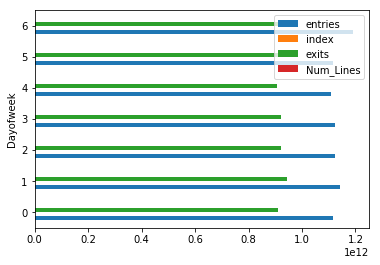

In [21]:
#Your code here
df.date = pd.to_datetime(df.date)
df['Dayofweek'] = df.date.dt.dayofweek
grouped = df.groupby('Dayofweek').sum()
grouped.plot(kind='barh')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes

In [ ]:
#Your code here

## Drop a couple of columns

In [25]:
# Your code here
df.drop(["time", "desc", "entries", "linename", "c/a", "station", "Num_Lines"], axis = 1)


,index,unit,scp,division,date,exits,Dayofweek
0,0,R051,02-00-00,BMT,2018-08-25,2283184,5
1,1,R051,02-00-00,BMT,2018-08-25,2283188,5
2,2,R051,02-00-00,BMT,2018-08-25,2283229,5
3,3,R051,02-00-00,BMT,2018-08-25,2283314,5
4,4,R051,02-00-00,BMT,2018-08-25,2283384,5
5,5,R051,02-00-00,BMT,2018-08-25,2283425,5
6,6,R051,02-00-00,BMT,2018-08-26,2283460,6
7,7,R051,02-00-00,BMT,2018-08-26,2283461,6
8,8,R051,02-00-00,BMT,2018-08-26,2283483,6
9,9,R051,02-00-00,BMT,2018-08-26,2283524,6


## Summary

Great! You practiced your data cleanup-skills using Pandas.